# 图像处理

## 基础包和函数准备

In [3]:
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

img_path = "../resource/image/lenna.png"
# 加载图像
def load_normal(Path):
	print('loading' + Path)
	imgN = cv2.imread(Path)
	return imgN

# 使用matplotlib画图
def paint(img, img_gray):
	# 用matplotlib的函数来显示原始图像
	plt.subplot(231)
	plt.imshow(img)
	# 用matplotlib的函数来显示灰度图像
	plt.subplot(232)
	plt.imshow(img_gray) # 使用默认的颜色映射
	# 用matplotlib的函数来显示灰度图像
	plt.subplot(233)
	plt.imshow(img_gray,cmap='gray') # 使用默认的颜色映射

## 上下采点实现

### 向上采点

> 原理：内差值

#### 最邻近差值

代码实现：


In [2]:
# 定义函数，用于改变图片大小 也可以将此方法换为cv2.resize(img, (800,800,c),near/bin)
def resize_img(dst_height: int, dst_width: int, src_img):
    # 获取图片的高、宽、通道数
    print('src_img.shape: ', src_img.shape)
    src_height, src_width, src_channels = src_img.shape
    # 创建一个零矩阵
    dstImage = np.zeros((dst_height, dst_width, src_channels), np.uint8)
    # print('dstImage:↩︎ \n %s' % dstImage)
    # 计算高、宽缩放比例
    sh = dst_height/src_height
    sw = dst_width/src_width
    # 遍历矩阵
    for i in range(dst_height):
        for j in range(dst_width):
            # 计算x、y坐标
            x = int(i/sh + 0.5)  # int(),转为整型，使用向下取整。
            y = int(j/sw + 0.5)
            # 将图片像素值赋值给新矩阵
            dstImage[i, j] = src_img[x, y]
    # 返回新矩阵
    # print('dstImage:↩︎ \n %s' % dstImage)
    return dstImage

# 读取图片
img = load_normal(img_path)
# 调用函数，改变图片大小
zoom = resize_img(800, 800, img)
# 显示新矩阵和原矩阵
cv2.imshow("nearest interp", zoom)
cv2.imshow("image", img)
# 等待按键
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'load_normal' is not defined

#### 双线性差值

In [ ]:
# 定义双线性插值函数，用于将图片缩放到指定大小
def bilinear_interpolation(img, out_dim):
    # 获取图片的宽、高和通道数
    src_h, src_w, channel = img.shape
    # 获取指定大小的宽、高
    dst_h, dst_w = out_dim[1], out_dim[0]
    print("src_h, src_w = ", src_h, src_w)
    print("dst_h, dst_w = ", dst_h, dst_w)
    # 如果图片的宽、高和指定大小的宽、高相等，则直接返回
    if src_h == dst_h and src_w == dst_w:
        return img.copy()
    # 初始化指定大小的图片
    dst_img = np.zeros((dst_h, dst_w, 3), dtype=np.uint8)
    # 计算宽、高比
    scale_x, scale_y = float(src_w) / dst_w, float(src_h) / dst_h
    # 遍历每一个通道
    for i in range(3):
        # 遍历指定大小的每一个像素点
        for dst_y in range(dst_h):
            for dst_x in range(dst_w):

                # 计算源图片的像素点坐标
                # 使用几何中心对称
                # 如果使用直接法，则 src_x = dst_x * scale_x
                src_x = (dst_x + 0.5) * scale_x-0.5
                src_y = (dst_y + 0.5) * scale_y-0.5

                # 计算源图片的四个像素点坐标
                src_x0 = int(np.floor(src_x))
                src_x1 = min(src_x0 + 1, src_w - 1)
                src_y0 = int(np.floor(src_y))
                src_y1 = min(src_y0 + 1, src_h - 1)

                # 计算插值
                temp0 = (src_x1 - src_x) * img[src_y0, src_x0,
                                               i] + (src_x - src_x0) * img[src_y0, src_x1, i]
                temp1 = (src_x1 - src_x) * img[src_y1, src_x0,
                                               i] + (src_x - src_x0) * img[src_y1, src_x1, i]
                dst_img[dst_y, dst_x, i] = int(
                    (src_y1 - src_y) * temp0 + (src_y - src_y0) * temp1)

    return dst_img

img = load_normal(img_path)
dst = bilinear_interpolation(img, (700, 700))
cv2.imshow('src_img', img)
cv2.imshow('dst_img', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 向下采点

> 原理：(m/s)*(n/s)


## 彩色图像的灰度化

### 自己写轮子

1. 获取图片的high和wide
2. 创建一张和当前图片大小一样的单通道图片
3. 遍历当前high和wide中的BGR坐标
4. 取出当前high和wide中的BGR坐标
5. 计算当前BGR坐标的灰度值
6. 保存当前灰度值到当前high和wide中的坐标

loading/Users/kobe/dev/code/my_codes/ai_project/practice/02-picture-math/lenna.png


/var/folders/z6/fpkw7pxn1tsc9swxz1dstll00000gn/T/ipykernel_63194/2166541166.py:14: RuntimeWarning: overflow encountered in scalar add
  img_gray4[i, j] = int((m[0] + m[1] + m[2])/3)  # 将BGR坐标转化为gray坐标并赋值给新图像 平均值方法


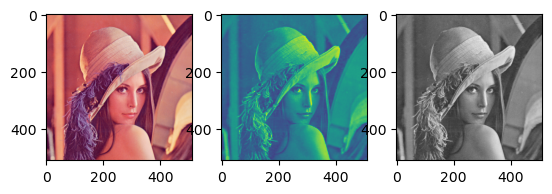

In [4]:
src_img = load_normal(img_path)
h, w = src_img.shape[:2]
img_gray1 = np.zeros([h, w], src_img.dtype)
# img_gray2 = np.zeros([h, w], src_img.dtype)
# img_gray3 = np.zeros([h, w], src_img.dtype)
# img_gray4 = np.zeros([h, w], src_img.dtype)
# img_gray5 = np.zeros([h, w], src_img.dtype)
for i in range(h):
    for j in range(w):
        m = src_img[i, j]  # 取出当前high和wide中的BGR坐标
        img_gray1[i, j] = int(m[0]*0.11 + m[1]*0.59 + m[2] * 0.3)  # 将BGR坐标转化为gray坐标并赋值给新图像 浮点方法
        # img_gray2[i, j] = int((m[0]*11 + m[1]*59 + m[2] * 3)/100)  # 将BGR坐标转化为gray坐标并赋值给新图像 整数方法
        # img_gray3[i, j] = int((m[0]*28 + m[1]*151 + m[2] * 76)>>8)  # 将BGR坐标转化为gray坐标并赋值给新图像 移位方法
        # img_gray4[i, j] = int((m[0] + m[1] + m[2])/3)  # 将BGR坐标转化为gray坐标并赋值给新图像 平均值方法
        # img_gray5[i, j] = m[0]  # 将BGR坐标转化为gray坐标并赋值给新图像 仅取绿色方法
# 打印图像中所有的BGR数值
# print("image show gray:↩︎\n %s" % img_gray)
# 打开窗口展示gray处理后lenna
# cv2.imshow("image show gray", img_gray)

src_img = plt.imread(img_path)
# print("---image lenna:↩︎ \n %s" % img)

# 画图
paint(src_img, img_gray1)
# paint(src_img, img_gray2)
# paint(src_img, img_gray3)
# paint(src_img, img_gray4)
# paint(src_img, img_gray5)


### cv模块方法

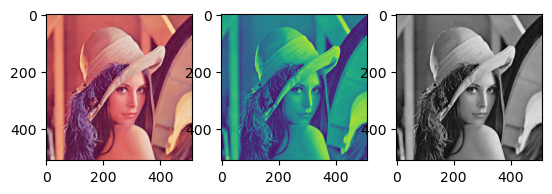

In [4]:
# 图像灰度化的模块方法
img_gray = rgb2gray(src_img)
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

paint(src_img, img_gray)

# 二值化

img_binary1.shape: (512, 512)
img_binary2.shape: (512, 512)


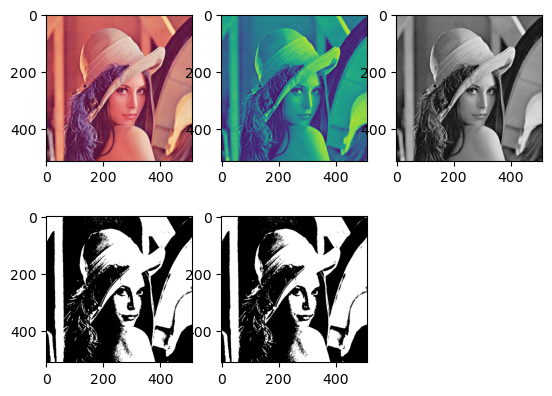

: 

In [5]:
# 转为二值图 方式1
rows, cols = img_gray.shape
img_binary1 = np.zeros([rows, cols], img_gray.dtype)
# print('img_binary1: %s' % img_binary1)
for i in range(rows):
    for j in range(cols):
        if (img_gray[i, j] <= 0.5):
            img_binary1[i, j] = 0
        else:
            img_binary1[i, j] = 1
# print('img_binary1:↩︎\n %s" % img_binary1)
print("img_binary1.shape:", img_binary1.shape)

# 转为二值图 方式2
img_binary2 = np.where(img_gray >= 0.5, 1, 0)
# print("-----imge_binary:↩︎\n %s" % img_binary2)
print("img_binary2.shape:", img_binary2.shape)

# 画图
plt.subplot(231)
plt.imshow(src_img)
plt.subplot(232)
plt.imshow(img_gray)
plt.subplot(233)
plt.imshow(img_gray, cmap='gray')
plt.subplot(234)
plt.imshow(img_binary1, cmap='gray')
plt.subplot(235)
plt.imshow(img_binary2, cmap='gray')
plt.show()